In [1]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import IPython
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio
from glob import glob
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import os


# 1. 환경 설정

In [2]:
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

BATCH_SIZE = 64
EPOCH = 100

### 오디오 전처리 된 버전 or 원본 사용 
INPUT_PATH = 'data/*'
#INPUT_PATH = 'data_pr/*'

### 오디오 퀄리티 안 좋은 것 제거할지
EXCLUDED = False

2023-02-15 07:56:17.228019: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-15 07:56:18.075232: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22844 MB memory:  -> device: 0, name: TITAN RTX, pci bus id: 0000:1a:00.0, compute capability: 7.5
2023-02-15 07:56:18.076363: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22841 MB memory:  -> device: 1, name: TITAN RTX, pci bus id: 0000:68:00.0, compute capability: 7.5


# 2. 데이터 준비

In [3]:
flist = sorted([ f for f in glob(INPUT_PATH) if '.wav' in f])
flist_lb = sorted([f for f in glob(INPUT_PATH) if '.npy' in f])

excepts = ['101', '104', '107', '108_1b1_Al_sc_Meditron', '109', '110', '112', '113', '118', '120', '124', '130', '133', 
'138', '139', '141', '144', '146_8p3_Lr_mc_AKGC417L', '147_2b3_Ll_mc_AKGC417L', '147_2b3_Pl_mc_AKGC417L', 
'149', '150', '151', '154_2b4_Tc_mc_AKGC417L', '158', '163_8b3_Lr_mc_AKGC417L', '172_1b3_Al_mc_AKGC417L', 
'172_1b3_Ar_mc_AKGC417L', '172_1b3_Ll_mc_AKGC417L', '172_1b3_Lr_mc_AKGC417L', '172_1b3_Pl_mc_AKGC417L', 
'172_1b3_Pr_mc_AKGC417L', '172_1b3_Tc_mc_AKGC417L', '172_1b4_Al_mc_AKGC417L', '172_1b4_Ar_mc_AKGC417L', 
'172_1b4_Ll_mc_AKGC417L', '172_1b4_Lr_mc_AKGC417L', '172_1b4_Pl_mc_AKGC417L', '172_1b4_Pr_mc_AKGC417L', 
'172_1b4_Tc_mc_AKGC417L', '172_1b5_Ll_mc_AKGC417L', '173_1b1_Al_sc_Meditron', '174', 
'175', '177_1b4_Al_mc_AKGC417L', '177_1b4_Lr_mc_AKGC417L', '178_1b2_Al_mc_AKGC417L', '178_1b2_Ar_mc_AKGC417L', 
'178_1b2_Lr_mc_AKGC417L', '178_1b2_Pl_mc_AKGC417L', '178_1b2_Pr_mc_AKGC417L', '178_1b3_Lr_mc_AKGC417L', '178_1b3_Pl_mc_AKGC417L', '178_1b3_Pr_mc_AKGC417L', 
'178_1b6_Ll_mc_AKGC417L', '178_1b6_Lr_mc_AKGC417L', '178_1b6_Pl_mc_AKGC417L', '178_1b6_Pr_mc_AKGC417L', '178_2b2_Ar_mc_AKGC417L', '178_2b2_Pr_mc_AKGC417L', 
'179_1b1_Al_sc_Meditron', '180', '185', '186_2b2_Pl_mc_AKGC417L', '186_2b2_Pr_mc_AKGC417L', '186_2b3_Pl_mc_AKGC417L', '186_2b3_Pr_mc_AKGC417L', 
'186_2b4_Pl_mc_AKGC417L', '186_2b4_Pr_mc_AKGC417L', '186_3b3_Pl_mc_AKGC417L', '186_3b3_Pr_mc_AKGC417L', '193_1b2_Al_mc_AKGC417L', '193_1b2_Ar_mc_AKGC417L', 
'193_1b2_Ll_mc_AKGC417L', '193_1b2_Pl_mc_AKGC417L', '193_1b2_Pr_mc_AKGC417L', '193_1b4_Lr_mc_AKGC417L', '193_7b3_Pr_mc_AKGC417L', '195', '198', '199_2b1_Ll_mc_LittC2SE', 
'200_2p2_Al_mc_AKGC417L', '200_2p2_Ar_mc_AKGC417L', '200_2p2_Lr_mc_AKGC417L', '200_2p2_Pl_mc_AKGC417L', '200_2p4_Ar_mc_AKGC417L', '200_2p4_Lr_mc_AKGC417L', 
'200_2p4_Lr_mc_AKGC417L', '200_2p4_Pl_mc_AKGC417L', '200_2p4_Pr_mc_AKGC417L', '200_3p4_Pl_mc_AKGC417L', '200_3p4_Pr_mc_AKGC417L', '203_1p2_Al_mc_AKGC417L', 
'203_1p2_Ar_mc_AKGC417L', '203_1p2_Lr_mc_AKGC417L', '204_2b5_Al_mc_AKGC417L', '204_2b5_Ll_mc_AKGC417L', '204_7p5_Lr_mc_AKGC417L', '205_2b2_Pr_mc_AKGC417L', 
'205_4b2_Lr_mc_AKGC417L', '206', '213', '216', '218', '223']

if EXCLUDED == True:
    flist = [f for f in flist if f.split('/')[-1].split('_')[0] not in excepts and f.split('/')[-1].split('.')[0] not in excepts]
    flist_lb = [f for f in flist_lb if f.split('/')[-1].split('_')[0] not in excepts and f.split('/')[-1].split('.')[0] not in excepts]

In [4]:
total_lb = []
for f in flist_lb:
     total_lb += [ np.load(f) ]
total_lb = np.array(total_lb)

df = pd.DataFrame(total_lb)
df['sbj'] = flist
df['sbj'] = df.sbj.str.split('/', expand=True)[1].str.split('_', expand=True)[0]
df = df.groupby('sbj').mean().reset_index()

# 학습:평가 9:1로 임의로 분할
train_ids, test_ids, y_train, y_test = train_test_split(df.sbj, df[0], test_size=0.1, stratify=df.round(0)[0])
train_ids, test_ids = train_ids.values, test_ids.values

train_ids, test_ids

(array(['217', '156', '195', '123', '175', '218', '132', '178', '138',
        '197', '199', '163', '188', '173', '107', '157', '119', '221',
        '193', '116', '224', '153', '151', '141', '164', '147', '105',
        '131', '201', '126', '176', '167', '189', '225', '198', '134',
        '108', '146', '174', '194', '140', '133', '184', '186', '148',
        '180', '172', '206', '200', '170', '166', '203', '220', '191',
        '117', '183', '102', '177', '152', '118', '182', '137', '185',
        '150', '190', '145', '135', '210', '149', '226', '104', '212',
        '168', '155', '121', '209', '120', '213', '223', '130', '204',
        '207', '169', '222', '192', '144', '115', '171', '159', '181',
        '142', '113', '129', '101', '205', '154', '136', '187', '179',
        '211', '196', '215', '165', '128', '219', '103', '111', '106'],
       dtype=object),
 array(['158', '161', '162', '109', '143', '114', '110', '139', '216',
        '160', '125', '112', '122'], dtype=object))

(array([1., 1., 3., 1., 1., 2., 1., 2., 0., 1.]),
 array([1.10638889, 1.48752396, 1.86865903, 2.2497941 , 2.63092917,
        3.01206424, 3.39319931, 3.77433438, 4.15546944, 4.53660451,
        4.91773958]),
 <BarContainer object of 10 artists>)

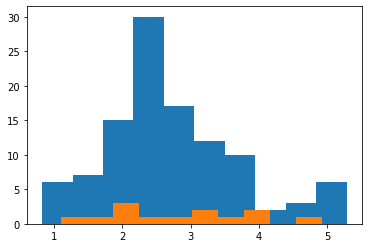

In [5]:
plt.hist(y_train)
plt.hist(y_test) 

# 3. 데이터 파이프라인

In [6]:
# 정규화 때 사용할 변수 추출
norm_m = df[[0,1]].mean().values
norm_sd = df[[0,1]].std(axis=0).values

norm_m, norm_sd

(array([2.72569011, 0.66516152]), array([0.97592334, 0.87980762]))

In [7]:
@tf.function
def choose_file(filenames):
    
    flist = tf.strings.split(filenames, sep=' ')
    
    len_list = tf.size(flist)
    rand_var = tf.random.uniform([1],0,len_list, dtype=tf.int32)
    sel_f = tf.gather(flist,rand_var[0])

    return sel_f, tf.strings.regex_replace(sel_f, '.wav', '.npy')

# YAMNET에서 Embedding Vector 추출
@tf.function
def get_embeddings(wav_file, lb_file):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(wav_file)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1) 
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    #wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    
    scores, embeddings, spectrogram = yamnet_model(wav)
    return embeddings, lb_file

def get_labels(wav, lb_file):
    data = np.load(lb_file.numpy().decode())
    
    data = (data.astype(np.float32) - norm_m)/norm_sd
    return wav, data

In [8]:
def get_dataset(sbj_ids, training=False):
    target_flist = []

    for sbj in sbj_ids:

        tmp = [f for f in flist if f.split('/')[-1].split('_')[0] in sbj ]

        if len(tmp) != 0:
            target_flist += [ ' '.join(tmp) ]
            
    dataset = tf.data.Dataset.from_tensor_slices(target_flist)
    dataset = dataset.map(choose_file)

    if training == True:
        #dataset = dataset.shuffle(len(sbj_ids))
        dataset = dataset.repeat()

    dataset = dataset.map(get_embeddings, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.map(
            lambda wav, lb_file: tuple(tf.py_function(get_labels, [wav, lb_file], [tf.float32, tf.float32,])))

    dataset = dataset.batch(BATCH_SIZE)  
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

In [9]:
train_dataset = get_dataset(train_ids, True)
test_dataset = get_dataset(test_ids, False)

# 4. 모델 학습

In [10]:
class LossAndErrorPrintingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        print("Epoch {}/{}".format(epoch+1, EPOCH))

checkpoint_filepath = 'tmp/checkpoint'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_mae',
    mode='min',
    save_best_only=True)


In [39]:
# 입력: YAMNET Embedding Vector Array 
# (a, b, c) --> a: 시간축 (YAMNET은 최근 0.96초를 보고 0.48초 단위로 값 생성 -> 41칸 ~ 20초), b: Embedding 차원 수, c: Conv 돌리기 위한 임의 추가 채널 

# 출력: Breathing Cycle 길이 평균 (초), Breathing Cycle 길이 분산
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(41, 1024)),
  tf.keras.layers.Conv1D(16, 1, padding = 'same', activation='relu'),
  tf.keras.layers.Conv1D(16, 5, padding = 'same', activation='relu'),
  tf.keras.layers.MaxPooling1D(2),
  tf.keras.layers.Conv1D(32, 5, padding = 'same', activation='relu'),
  tf.keras.layers.MaxPooling1D(2),
  tf.keras.layers.Conv1D(32, 5, padding = 'same', activation='relu'),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(2),
])


model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), metrics=['mae'])

train_steps_per_epoch = math.ceil(len(train_ids) / BATCH_SIZE)
test_steps_per_epoch = math.ceil(len(test_ids) / BATCH_SIZE)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 41, 16)            16400     
                                                                 
 conv1d_29 (Conv1D)          (None, 41, 16)            1296      
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 20, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_30 (Conv1D)          (None, 20, 32)            2592      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 10, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_31 (Conv1D)          (None, 10, 32)           

In [ ]:
model.fit(
    train_dataset,
    epochs=EPOCH, 
    steps_per_epoch=train_steps_per_epoch,
    validation_data=test_dataset,
    validation_steps= test_steps_per_epoch,
    callbacks=[LossAndErrorPrintingCallback(), model_checkpoint_callback],
    verbose=1
)


Epoch 54/100
2/2 [==============================] - 2s 2s/step - loss: 0.4353 - mae: 0.4919 - val_loss: 0.4721 - val_mae: 0.5557
Epoch 55/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2939 - mae: 0.4152

# 5. 결과 확인

In [34]:
# Best 모델 저장 시 모니터링 하지 않았던 다른 데이터로 평가하는 것이 더 적절하지만, 
# 데이터가 너무 적어 동일한 데이터로 결과 확인 
# (향후 실제 녹음한 다른 오디오로 테스트 해봐야 할 듯)
model.load_weights(checkpoint_filepath)

pred = []
true = []
for d in test_dataset:
    pred += model(d[0]).numpy().tolist()
    true += d[1].numpy().tolist() 

pred = (np.array(pred)*norm_sd)+norm_m
true = (np.array(true)*norm_sd)+norm_m

MAE: 0.43301526470693463, R: 0.6978296365335875


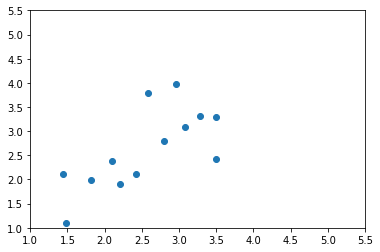

In [35]:
from sklearn.metrics import r2_score
# Breathing Cycle 길이 평균 (초)
plt.scatter(pred[:,0], true[:,0])
plt.xlim(1, 5.5)
plt.ylim(1, 5.5)

print("MAE: {}, R: {}".format(np.mean(np.abs(pred[:,0] - true[:,0])), np.corrcoef(pred[:,0], true[:,0])[0,1]))

MAE: 0.3964661851655349, R: 0.31095952903165525


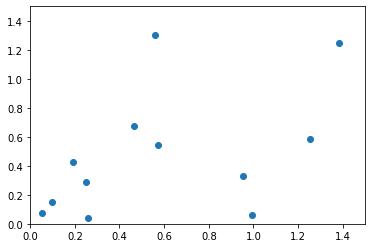

In [36]:
# Breathing Cycle 길이 분산
plt.scatter(pred[:,1], true[:,1])
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

print("MAE: {}, R: {}".format(np.mean(np.abs(pred[:,1] - true[:,1])), np.corrcoef(pred[:,1], true[:,1])[0,1]))

### 분당 호흡수를 구하려면 "60 / 호흡 길이 평균"

MAE: 4.799195063953069, R: 0.7527069485619481


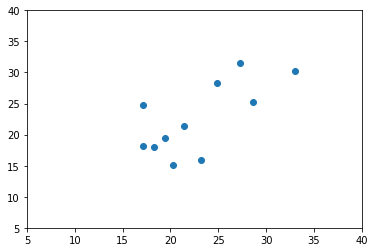

In [37]:
# 분당 호흡수
plt.scatter(60/pred[:,0], 60/true[:,0])
plt.xlim(5, 40)
plt.ylim(5, 40)

print("MAE: {}, R: {}".format(np.mean(np.abs(60/pred[:,0] - 60/true[:,0])), np.corrcoef(60/pred[:,0], 60/true[:,0])[0,1]))

In [38]:
r2_score(60/true[:,0], 60/pred[:,0])

0.5627077825990354